## x_train (pure images from dataset)

In [ ]:

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread, imshow
from tensorflow import keras
data_path = '../input/mydata4'

row = 256
columns = 256

train_data_path = os.path.join(data_path, 'train')
images = os.listdir(train_data_path)
images.sort()

training_images = images[1::2]
training_masks = images[::2] 
print(len(training_images)) #20
print(len(training_masks))
x_train = np.zeros((len(training_images), row, columns, 3), dtype=np.uint8)
index = 0
for x in training_images:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_train[index] = image
    index += 1
print(x_train.shape)
#x_train = x_train / 255
#x_train = x_train.astype('float32')
imshow(x_train[0])
print(x_train.dtype)

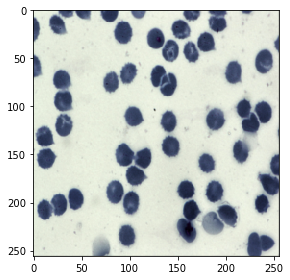

# # y_train (pure masks from dataset)

In [ ]:

y_train = np.zeros((len(training_masks), row, columns, 3), dtype=np.uint8)
#p = os.path.join(train_data_path, training_masks[0])
#i = imread(p)
#k = resize(i, (128, 128))
#imshow(k)

index = 0
for x in training_masks:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
    #image.resize((128,128,1))
    y_train[index] = image
    index += 1
y_train.shape  
type(y_train)
#y_train = y_train / 255
#y_train = y_train.astype('float32')
print(y_train.dtype)
imshow(y_train[0])

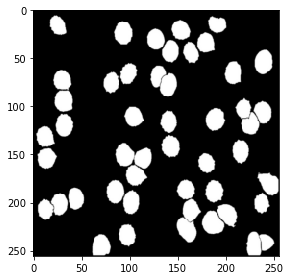

# Augmentation

In [ ]:
import albumentations as A

transform = A.Compose([
    #A.RandomCrop(width=512, height=512),
    A.HorizontalFlip(p=0.5),
    #A.VerticalFlip(p=1),
    #A.RandomRotate90(p=1),
    A.RandomBrightnessContrast(p=0.5),
    A.Blur(blur_limit=7, always_apply=True, p=1.5),
    A.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5, always_apply=True, p=0.5),
    A.GaussNoise (var_limit=(10.0, 50.0), mean=0, always_apply=True, p=0.5)
])

# aug_x_train (Augmented images from dataset)
# aug_y_train (Augmented masks from dataset)

In [ ]:
import os
import numpy as np
from skimage.io import imread, imshow
train_dir = '../input/mydata4/train'
new_images = os.listdir(train_dir)
new_images.sort()
new_training_image = new_images[1::2]
new_training_mask = new_images[::2]
aug_x_train = np.zeros((len(new_training_image), 1200, 1600, 3), dtype=np.uint8)
aug_y_train = np.zeros((len(new_training_mask), 1200, 1600, 3), dtype=np.uint8)
#print(aug_x_train.shape)
count = 0
for x in range(len(new_training_image)):
    image1 = imread(os.path.join(train_dir, new_training_image[x]))  
    mask1 = imread(os.path.join(train_dir, new_training_mask[x]))
    transformed = transform(image=image1, mask=mask1)
    #print(transformed['image'].shape)
    aug_x_train[count] = transformed['image']
    aug_y_train[count] = transformed['mask']
    count += 1
print(aug_x_train.shape)
print(aug_y_train.shape)


In [ ]:
imshow(aug_x_train[19])

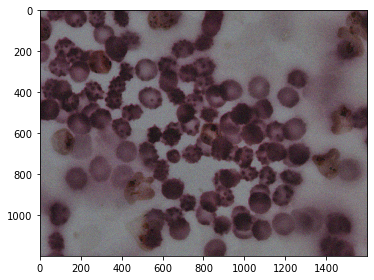

In [ ]:
imshow(aug_y_train[19])

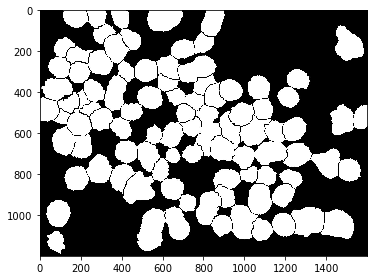

# Augmented images + masks saved on cwd for inspection

In [ ]:
from skimage.io import imsave
pred_dir = './new_preds'
if not os.path.exists(pred_dir):
    os.mkdir(pred_dir)
for x in range(len(aug_x_train)):
    imsave(os.path.join(pred_dir, '0' + str(x) + '_image' + '.png'), aug_x_train[x])
    imsave(os.path.join(pred_dir, '0' + str(x) + '_mask'  + '.jpg'), aug_y_train[x])
    

In [ ]:
meow = os.listdir('./new_preds')
meow.sort()
meow
aug_train_image = meow[::2] 
#new_train
aug_train_mask = meow[1::2]

total_train_images = training_images + aug_train_image
total_train_images

In [ ]:
total_train_masks = training_masks + aug_train_mask
total_train_masks

# total_x_train (pure images + augmented images)

In [ ]:
total_x_train = np.zeros((len(training_images) + len(new_training_image), row, columns, 3), dtype=np.uint8)
t_path = '../input/mydata4/train'
c = 0
d = 0 
for x in total_train_images:
    if c< len(training_images):
        img = imread(os.path.join(t_path, x))
        img = resize(img, (row, columns), mode='constant', preserve_range=True)
        total_x_train[c] = img
        c += 1
    else: 
        #img2 = imread(os.path.join('./new_preds', x))
        #img2 = resize(img2, (512, 512), mode='constant', preserve_range=True)
        #total_x_train[c] = img2
        #c += 1
        total_x_train[c] = resize(aug_x_train[d], (row, columns), mode='constant', preserve_range=True)
        c += 1
        d += 1

In [ ]:
imshow(total_x_train[19])

In [ ]:
imshow(x_train[19])

In [ ]:
imshow(total_x_train[38])

In [ ]:
imshow(aug_x_train[18])

# total_y_train (pure masks + augmented masks)

In [ ]:
total_y_train = np.zeros((len(training_masks)  + len(new_training_mask), row, columns, 3), dtype=np.uint8)
t_path = '../input/mydata4/train'
c = 0
d = 0 
for x in total_train_masks:
    if c< len(training_masks):
        img = imread(os.path.join(t_path, x))
        img = resize(img, (row, columns), mode='constant', preserve_range=True)
        total_y_train[c] = img
        c += 1
    else: 
        #img2 = imread(os.path.join('./new_preds', x))
        #img2 = resize(img2, (512, 512), mode='constant', preserve_range=True)
        #total_x_train[c] = img2
        #c += 1
        total_y_train[c] = resize(aug_y_train[d], (row, columns), mode='constant', preserve_range=True)
        c += 1
        d += 1

In [ ]:
imshow(total_y_train[14])

In [ ]:
imshow(y_train[14])

In [ ]:
imshow(total_y_train[38])

In [ ]:
imshow(aug_y_train[18])

In [ ]:
print(total_x_train.shape)
print(total_y_train.shape)
print(total_x_train.dtype)
print(total_y_train.dtype)

# Important

In [ ]:
total_y_train = total_y_train.astype('bool')
print(total_y_train.dtype)

In [ ]:
''''
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread, imshow
from tensorflow import keras
data_path = '../input/data12'

row = 512
columns = 512

train_data_path = os.path.join(data_path, 'train')
images = os.listdir(train_data_path)
images.sort()

training_images = images[1::2]
training_masks = images[::2] 
print(len(training_images))
print(len(training_masks))
x_train = np.zeros((20, row, columns, 3), dtype=np.uint8)
index = 0
for x in training_images:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_train[index] = image
    index += 1
print(x_train.shape)
#x_train = x_train / 255
#x_train = x_train.astype('float32')
imshow(x_train[0])
print(x_train.dtype)
'''

In [ ]:
'''
y_train = np.zeros((20, row, columns, 3), dtype=np.uint8)
#p = os.path.join(train_data_path, training_masks[0])
#i = imread(p)
#k = resize(i, (128, 128))
#imshow(k)

index = 0
for x in training_masks:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
    #image.resize((128,128,1))
    y_train[index] = image
    index += 1
y_train.shape  
type(y_train)
#y_train = y_train / 255
#y_train = y_train.astype('float32')
print(y_train.dtype)
imshow(y_train[0])
'''

# x_test (Images for prediction)

In [ ]:
test_data_path = os.path.join(data_path, 'test')
images = os.listdir(test_data_path)
images.sort()
images

testing_images = images[1::2]
testing_masks = images[::2] 

x_test = np.zeros((5, row, columns, 3), dtype=np.uint8)

index = 0
for x in testing_images:
    path = os.path.join(test_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_test[index] = image
    index += 1
x_test.shape  
type(x_test)
#x_test = x_test / 255
#x_test = x_test.astype('float32')
print(x_test.dtype)
imshow(x_test[0])

# y_test (Ground truth for prediction)

In [ ]:
y_test = np.zeros((5, row, columns, 3), dtype=np.float32)

index = 0
for x in testing_masks:
    path = os.path.join(test_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    #image = image/255
    y_test[index] = image
    index += 1
y_test.shape  
y_test.dtype
type(y_test)
#y_test = y_test / 255
#y_test = y_test.astype('float32')
imshow(y_test[0])
print(y_test.dtype)